# Lab 3a: MNIST

El objetivo de este laboratorio es entrenar una red neuronal para clasificar dígitos escritos a mano. Para ello, utilizaremos el conjunto de datos MNIST, que contiene 70,000 imágenes de 28x28 píxeles en escala de grises de dígitos escritos a mano.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FCEIA-AAII/lab3/blob/main/solucion-a.ipynb)

## Preparación del entorno.

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [1]:
import os

REPO_NAME = "lab3"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
  os.chdir(REPO_NAME)



Importar librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

2024-03-25 10:48:41.839746: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Establecer GPU por defecto en caso de estar disponible.

In [3]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

## Análisis Exploratorio.

Cargar y visualizar los datos.

Ejemplos de entrenamiento: (60000, 28, 28)
Ejemplos de test: (10000, 28, 28)


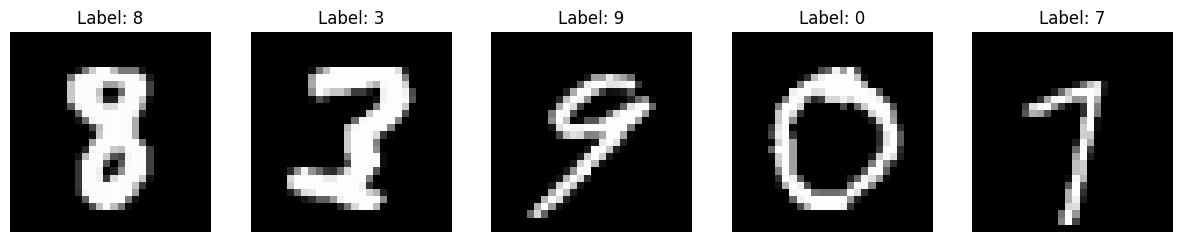

In [4]:
# Cargamos MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizamos los datos
X_train, X_test = X_train / 255.0, X_test / 255.0

print("Ejemplos de entrenamiento:", X_train.shape)
print("Ejemplos de test:", X_test.shape)

# Mostramos algunos ejemplos al azar:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    idx = np.random.randint(0, X_train.shape[0])
    axs[i].imshow(X_train[idx], cmap='gray')
    axs[i].set_title(f"Label: {y_train[idx]}")
    axs[i].axis('off')
plt.show()

## Entrenamiento

Definimos nuestro modelo usando tensorflow.

In [5]:
model = Sequential(
    [
        # Flatten convierte la imagen 2D en un vector 1D de 28*28=784 componentes.
        # Esto nos permite usar las imágenes directamente como entrada a la red.
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

Entrenamos el modelo.

In [6]:
model.compile(optimizer="adam",
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2601 - accuracy: 0.9261 - val_loss: 0.1409 - val_accuracy: 0.9594
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1147 - accuracy: 0.9653 - val_loss: 0.1114 - val_accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0784 - accuracy: 0.9765 - val_loss: 0.0931 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0574 - accuracy: 0.9827 - val_loss: 0.0782 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0727 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.0816 - val_accuracy: 0.9742
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.0824 - val_accuracy:

Plot del historial de métricas.

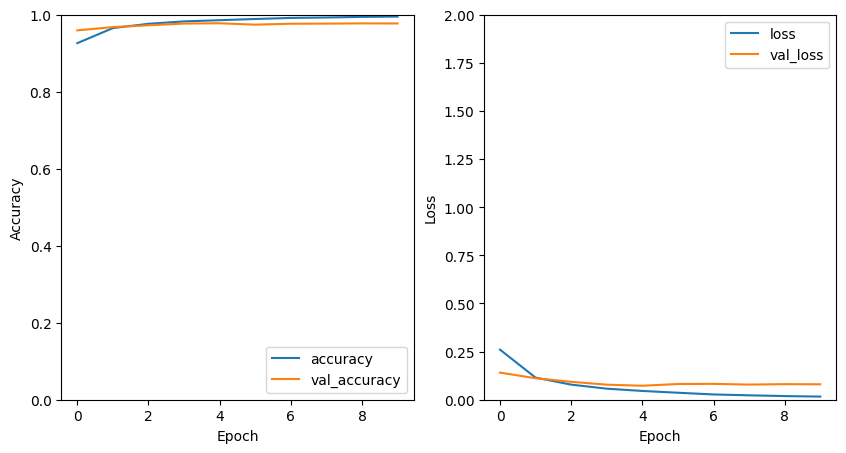

In [7]:
# Plot the training history, accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')


Probamos predicciones sobre el conjunto de test.

313/313 [==============================] - 0s 682us/step


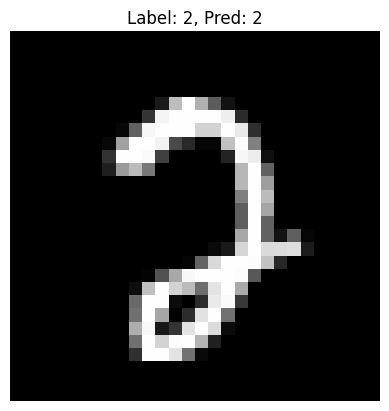

Probabilidades de cada clase: [0.   0.   0.97 0.   0.   0.   0.   0.03 0.   0.  ]
Clase más probable: 2
-------------------


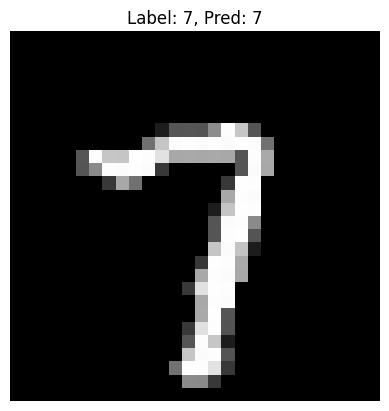

Probabilidades de cada clase: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Clase más probable: 7
-------------------


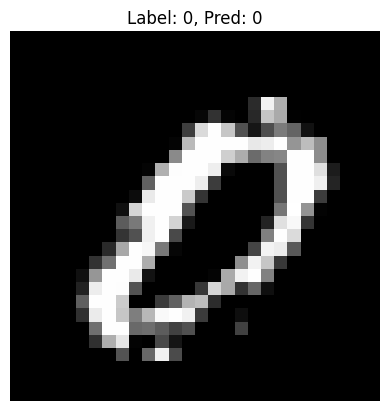

Probabilidades de cada clase: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Clase más probable: 0
-------------------


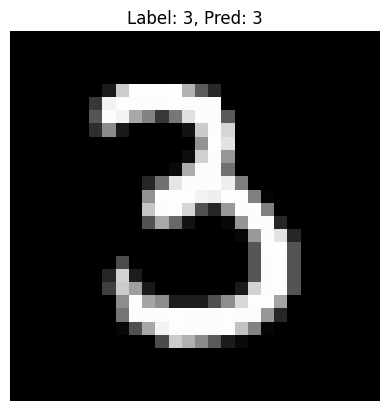

Probabilidades de cada clase: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Clase más probable: 3
-------------------


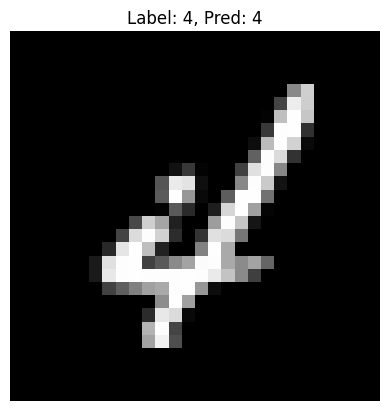

Probabilidades de cada clase: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Clase más probable: 4
-------------------


In [8]:
Y_pred = model.predict(X_test)

# Mostramos algunos ejemplos al azar:
for i in range(5):
    idx = np.random.randint(0, X_test.shape[0])
    x_test = X_test[idx]
    y_test_label = y_test[idx]
    y_pred = Y_pred[idx]
    plt.imshow(x_test, cmap='gray')
    plt.title(f"Label: {y_test_label}, Pred: {np.argmax(y_pred)}")
    plt.axis('off')
    plt.show()
    print("Probabilidades de cada clase:", y_pred.round(2))
    print("Clase más probable:", np.argmax(y_pred))
    print("-------------------")